In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import geopandas as gpd

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [3]:
gdf_seoul = gpd.read_file('../geo/LARD_ADM_SECT_SGG_11_202403.shp', encoding='cp949')
gdf_seoul = gdf_seoul.to_crs(epsg=4326)
gdf_seoul.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,종로구,11,11110,"POLYGON ((126.97448 37.63425, 126.97526 37.634..."
1,11140,중구,34,11140,"POLYGON ((126.99072 37.57035, 126.99095 37.570..."
2,11170,용산구,1,11170,"POLYGON ((126.94539 37.53600, 126.94541 37.536..."
3,11200,성동구,1,11200,"POLYGON ((127.02758 37.56726, 127.02729 37.567..."
4,11215,광진구,49,11215,"POLYGON ((127.07772 37.52474, 127.07510 37.525..."


In [4]:
seoul_id = pd.read_csv('../subway/서울시 읍면동마스터 정보.csv', encoding='cp949')
seoul_id

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
0,3138041,개군면,양평군,경기도
1,3138040,용문면,양평군,경기도
2,3138039,지평면,양평군,경기도
3,3138038,양동면,양평군,경기도
4,3138037,청운면,양평군,경기도
...,...,...,...,...
1133,1101057,무악동,종로구,서울
1134,1101056,평창동,종로구,서울
1135,1101055,부암동,종로구,서울
1136,1101054,삼청동,종로구,서울


In [5]:
seoul_subway = pd.read_csv('../subway/서울시 행정동별 지하철 총 승차 승객수 정보.csv', encoding='cp949')
seoul_subway

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20240323,1118060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20240323,1118058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20240323,1118055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20240323,1118053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20240323,1118051,19907.0,0.0,0.0,0.0,0.0,36.0,365.0,321.0,...,1370.0,1600.0,1959.0,2105.0,1556.0,1168.0,1018.0,943.0,577.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345023,20211130,1105057,10728.0,1.0,0.0,0.0,0.0,0.0,182.0,467.0,...,432.0,394.0,562.0,662.0,762.0,422.0,281.0,300.0,150.0,30.0
345024,20211130,1101061,95603.0,4.0,0.0,0.0,0.0,18.0,279.0,355.0,...,4781.0,6015.0,7236.0,12936.0,19579.0,8734.0,6512.0,7032.0,5214.0,1713.0
345025,20211130,1114066,101870.0,11.0,0.0,0.0,0.0,20.0,934.0,2075.0,...,3973.0,4469.0,5575.0,8175.0,13185.0,8303.0,6423.0,7907.0,7051.0,2576.0
345026,20211130,1114060,21633.0,0.0,0.0,0.0,0.0,2.0,184.0,517.0,...,975.0,1161.0,1450.0,2178.0,2229.0,1194.0,954.0,939.0,777.0,222.0


In [6]:
seoul = pd.merge(seoul_subway, seoul_id, on='행정동_ID', how='inner')
seoul.drop('행정동_ID', inplace=True, axis=1)
seoul = seoul.fillna(0)
seoul[seoul["시도_명칭"] == '서울']
df = seoul[['지하철_승객_수', '행정동_명칭', '자치구_명칭']]
df

,지하철_승객_수,행정동_명칭,자치구_명칭
0,0.0,시흥4동,금천구
1,0.0,시흥4동,금천구
2,0.0,시흥4동,금천구
3,0.0,시흥4동,금천구
4,0.0,시흥4동,금천구
...,...,...,...
342403,0.0,시흥5동,금천구
342404,0.0,시흥5동,금천구
342405,0.0,시흥5동,금천구
342406,0.0,시흥5동,금천구


In [7]:
grouped = df.groupby(['자치구_명칭'])['지하철_승객_수'].sum()
grouped.sort_values(ascending=False).head(20)

자치구_명칭
강남구     367989735.0
중구      297517122.0
서초구     272977236.0
송파구     245107334.0
마포구     218127480.0
영등포구    214139612.0
종로구     212078137.0
관악구     195531832.0
강서구     161925782.0
성동구     150001811.0
광진구     149454639.0
노원구     132997556.0
구로구     129744821.0
동작구     119386605.0
은평구     112111493.0
강동구     103623363.0
성북구     100089512.0
용산구      93226176.0
동대문구     81050924.0
서대문구     77435451.0
Name: 지하철_승객_수, dtype: float64

In [8]:
sub_info = pd.read_csv('../subway/서울_지하철_위치정보.csv', encoding='cp949')
sub_info

,id,역사명,운영기관명,역사도로명주소,위도,경도,노선명
0,1,서울,공항철도주식회사,서울특별시 용산구 청파로 378,37.552395,126.971069,인천국제공항선
1,2,공덕,공항철도주식회사,서울특별시 마포구 마포대로 92,37.543011,126.951188,인천국제공항선
2,3,홍대입구,공항철도주식회사,서울특별시 마포구 양화로 188,37.559528,126.924795,인천국제공항선
3,4,디지털미디어시티,공항철도주식회사,서울특별시 마포구 성암로 184,37.576866,126.899170,인천국제공항선
4,5,마곡나루,공항철도주식회사,서울특별시 강서구 마곡중앙로 지하 135,37.563596,126.827732,인천국제공항선
...,...,...,...,...,...,...,...
385,386,도곡역,한국철도공사,서울시 강남구 남부순환로 지하 2814,37.491984,127.058717,분당선
386,387,구룡역,한국철도공사,서울시 강남구 개포동 175번지,37.487747,127.058904,분당선
387,388,개포동역,한국철도공사,서울시 강남구 개포동 지하 420(개포동),37.480291,127.062627,분당선
388,389,대모산입구역,한국철도공사,서울시 강남구 일원동 611번지,37.488058,127.082867,분당선


In [9]:
subway = pd.read_csv('../subway_feature.csv')
subway

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387
...,...,...,...,...,...
763,154,종로5가,1호선,37.570926,127.001849
764,153,종로3가,1호선,37.570406,126.991847
765,152,종각,1호선,37.570161,126.982923
766,151,시청,1호선,37.565715,126.977088


In [10]:
# 서울시의 경계 위도와 경도
seoul_lat_min, seoul_lat_max = 37.429, 37.701
seoul_lon_min, seoul_lon_max = 126.764, 127.183

# 서울시 내에 있는 역 필터링
seoul_stations = subway[(subway['위도'] >= seoul_lat_min) & (subway['위도'] <= seoul_lat_max) &
                    (subway['경도'] >= seoul_lon_min) & (subway['경도'] <= seoul_lon_max)]

seoul_stations.head()

,역사_ID,역사명,호선,위도,경도
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
20,4807,신천,서해선,37.439066,126.786788
21,4806,시흥대야,서해선,37.450145,126.793041


In [11]:
seoul_stations.to_csv('../subway/seoul_subway.csv')

In [12]:
import json
import requests

api_key = 'd35167aab1b3d15057d327b37ba1aace'

def lat_lon_to_addr(lon,lat):
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={longitude}&y={latitude}'.format(longitude=lon,latitude=lat)
    headers = {"Authorization": "KakaoAK " + api_key}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address_name']
    return str(match_first)

In [13]:
# 각 행에 대해 위도와 경도를 주소로 변환
seoul_stations['주소'] = seoul_stations.apply(lambda row: lat_lon_to_addr(row['경도'], row['위도']), axis=1)
seoul_stations['주소']

/tmp/ipykernel_710256/1355578885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_stations['주소'] = seoul_stations.apply(lambda row: lat_lon_to_addr(row['경도'], row['위도']), axis=1)


1        서울특별시 강동구 강일동
2        서울특별시 강서구 방화동
3      경기도 김포시 고촌읍 신곡리
20         경기도 시흥시 신천동
21         경기도 시흥시 대야동
            ...       
763     서울특별시 종로구 종로5가
764     서울특별시 종로구 종로3가
765     서울특별시 종로구 종로1가
766        서울특별시 중구 정동
767     서울특별시 중구 봉래동2가
Name: 주소, Length: 464, dtype: object

In [14]:
seoul_stations[['시', '구', '동']] = seoul_stations['주소'].str.split(' ', n=2, expand=True)
seoul_stations

/tmp/ipykernel_710256/2277334742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_stations[['시', '구', '동']] = seoul_stations['주소'].str.split(' ', n=2, expand=True)
/tmp/ipykernel_710256/2277334742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_stations[['시', '구', '동']] = seoul_stations['주소'].str.split(' ', n=2, expand=True)
/tmp/ipykernel_710256/2277334742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,역사_ID,역사명,호선,위도,경도,주소,시,구,동
1,9995,강일,5호선,37.557490,127.175930,서울특별시 강동구 강일동,서울특별시,강동구,강일동
2,4929,김포공항,김포골드라인,37.562360,126.801868,서울특별시 강서구 방화동,서울특별시,강서구,방화동
3,4928,고촌,김포골드라인,37.601243,126.770345,경기도 김포시 고촌읍 신곡리,경기도,김포시,고촌읍 신곡리
20,4807,신천,서해선,37.439066,126.786788,경기도 시흥시 신천동,경기도,시흥시,신천동
21,4806,시흥대야,서해선,37.450145,126.793041,경기도 시흥시 대야동,경기도,시흥시,대야동
...,...,...,...,...,...,...,...,...,...
763,154,종로5가,1호선,37.570926,127.001849,서울특별시 종로구 종로5가,서울특별시,종로구,종로5가
764,153,종로3가,1호선,37.570406,126.991847,서울특별시 종로구 종로3가,서울특별시,종로구,종로3가
765,152,종각,1호선,37.570161,126.982923,서울특별시 종로구 종로1가,서울특별시,종로구,종로1가
766,151,시청,1호선,37.565715,126.977088,서울특별시 중구 정동,서울특별시,중구,정동


In [15]:
only_seoul = seoul_stations[seoul_stations['시'] == '서울특별시']
only_seoul.head()

,역사_ID,역사명,호선,위도,경도,주소,시,구,동
1,9995,강일,5호선,37.557490,127.175930,서울특별시 강동구 강일동,서울특별시,강동구,강일동
2,4929,김포공항,김포골드라인,37.562360,126.801868,서울특별시 강서구 방화동,서울특별시,강서구,방화동
24,4713,신설동,우이신설선,37.576095,127.023242,서울특별시 동대문구 신설동,서울특별시,동대문구,신설동
25,4712,보문,우이신설선,37.585286,127.019381,서울특별시 성북구 보문동2가,서울특별시,성북구,보문동2가
26,4711,성신여대입구(돈암),우이신설선,37.592467,127.016516,서울특별시 성북구 동소문동5가,서울특별시,성북구,동소문동5가


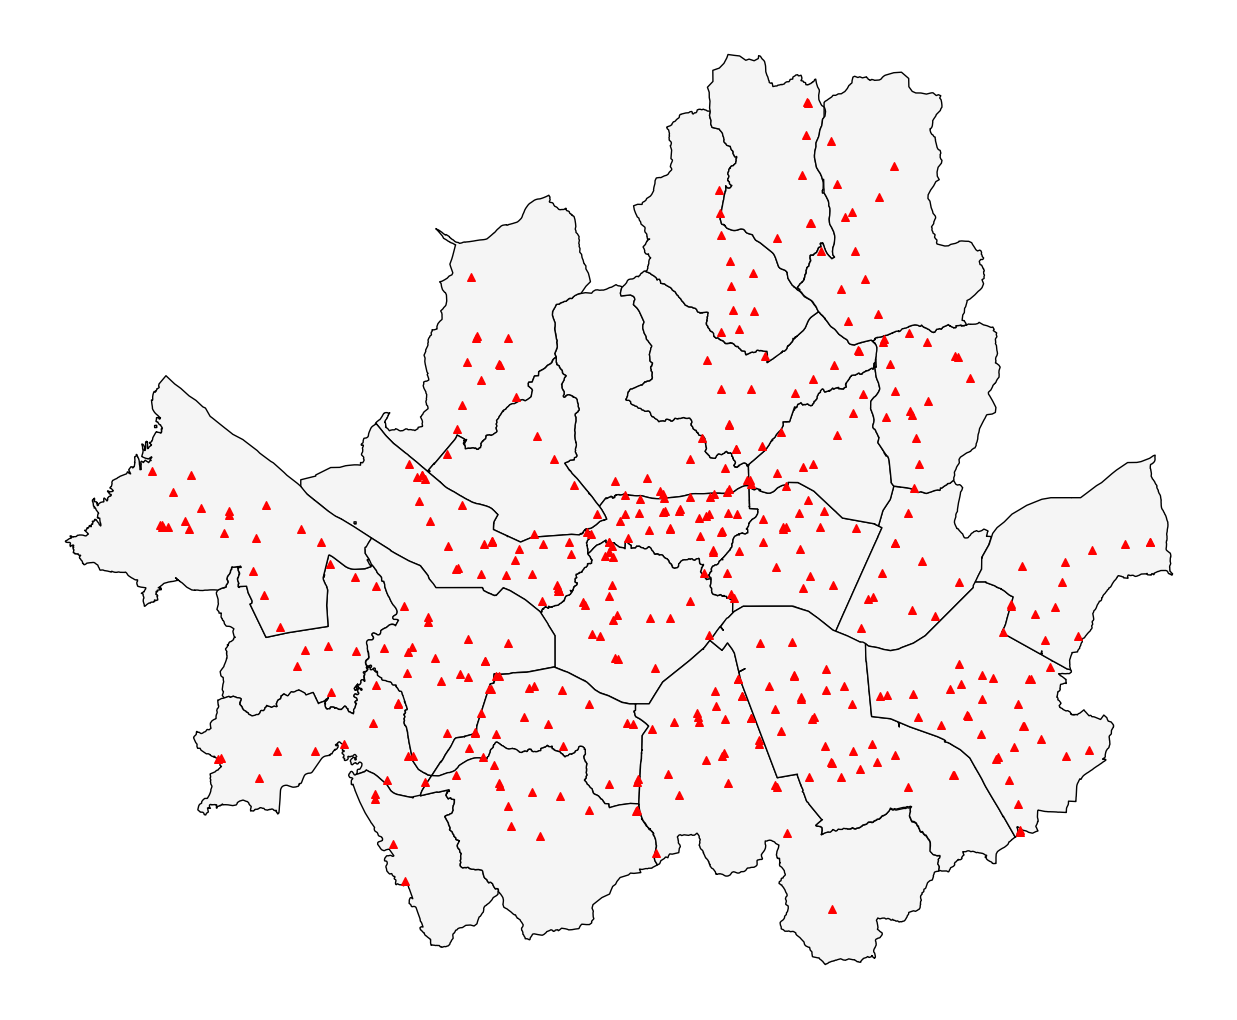

In [16]:
fig = plt.figure(figsize=(18, 13))
ax = fig.subplots(1, 1)
 
gdf_seoul.plot(color='whitesmoke', edgecolor='black', linewidth=1, ax=ax)

# 지하철역 위치
plt.scatter(only_seoul['경도'],
            only_seoul['위도'],
            color="red",
            marker='^',
            label='Subway Station',
            s=30)
ax.set_axis_off()
plt.show()

In [17]:
only_gyeonggi = seoul_stations[seoul_stations['시'] == '경기도']
only_gyeonggi.head()

,역사_ID,역사명,호선,위도,경도,주소,시,구,동
3,4928,고촌,김포골드라인,37.601243,126.770345,경기도 김포시 고촌읍 신곡리,경기도,김포시,고촌읍 신곡리
20,4807,신천,서해선,37.439066,126.786788,경기도 시흥시 신천동,경기도,시흥시,신천동
21,4806,시흥대야,서해선,37.450145,126.793041,경기도 시흥시 대야동,경기도,시흥시,대야동
22,4805,소새울,서해선,37.468467,126.797252,경기도 부천시 소사구 소사본동,경기도,부천시,소사구 소사본동
23,4804,소사,서해선,37.483279,126.795023,경기도 부천시 원미구 소사동,경기도,부천시,원미구 소사동


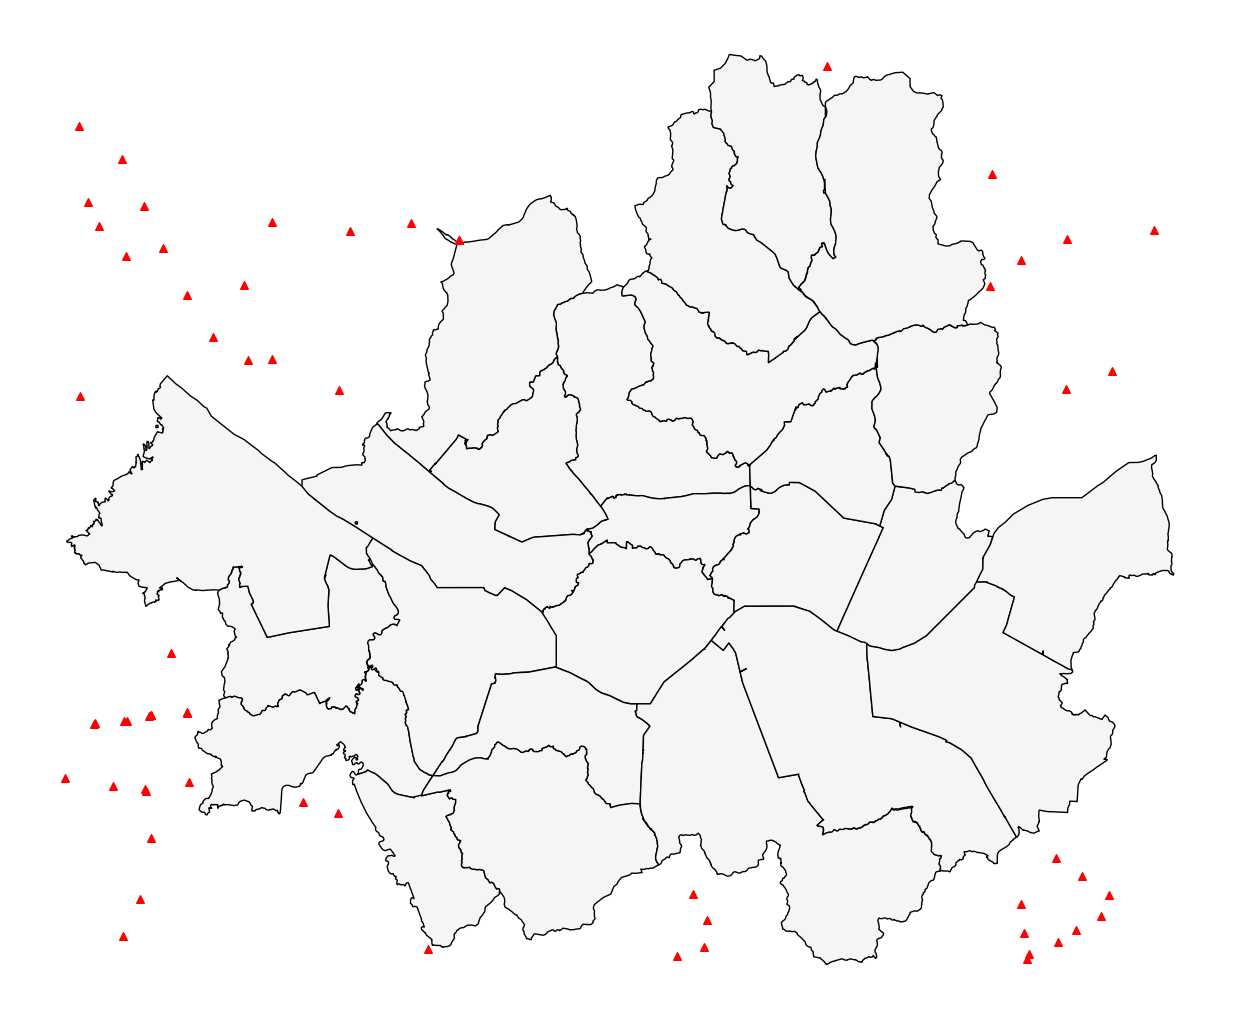

In [18]:
fig = plt.figure(figsize=(18, 13))
ax = fig.subplots(1, 1)
 
gdf_seoul.plot(color='whitesmoke', edgecolor='black', linewidth=1, ax=ax)

# 지하철역 위치
plt.scatter(only_gyeonggi['경도'],
            only_gyeonggi['위도'],
            color="red",
            marker='^',
            label='Subway Station',
            s=30)
ax.set_axis_off()
plt.show()

In [19]:
print(len(only_seoul['구'].unique()))
only_seoul['구'].unique()

25


array(['강동구', '강서구', '동대문구', '성북구', '강북구', '관악구', '동작구', '영등포구', '서초구',
       '강남구', '마포구', '용산구', '송파구', '양천구', '구로구', '금천구', '광진구', '중랑구',
       '노원구', '도봉구', '종로구', '중구', '은평구', '성동구', '서대문구'], dtype=object)

In [20]:
data = pd.read_csv('../merge5.csv')
data

/tmp/ipykernel_710256/2505382740.py:1: DtypeWarning: Columns (15,16,17,18,22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../merge5.csv')


,지번주소,계약년월,계약일,target,is_test,기준금리,인구밀도,CLI,시군구,아파트명,...,한강 인근,지하철역 수,아파트전세가격지수,주소,재건축,역까지_거리,1차역세권,2차역세권,정류장까지_거리,학군
0,서울특별시 강남구 개포동 658-1,201712,8,124000.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,0,0,92.7,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2
1,서울특별시 강남구 개포동 658-1,201712,22,123500.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,0,0,92.7,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2
2,서울특별시 강남구 개포동 658-1,201712,28,91500.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,0,0,92.7,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2
3,서울특별시 강남구 개포동 658-1,201801,3,130000.0,0,1.5,13859,93.5,서울특별시 강남구 개포동,개포6차우성,...,0,0,92.9,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2
4,서울특별시 강남구 개포동 658-1,201801,8,117000.0,0,1.5,13859,93.5,서울특별시 강남구 개포동,개포6차우성,...,0,0,92.9,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동 479,202307,28,NaN,1,3.5,20948,111.1,서울특별시 중랑구 신내동,중앙하이츠,...,0,0,83.8,중랑구 신내동 479,0.0,628.586509,0,0,49.828552,0
1128090,서울특별시 중랑구 신내동 479,202308,10,NaN,1,3.5,20948,111.4,서울특별시 중랑구 신내동,중앙하이츠,...,0,0,84.3,중랑구 신내동 479,0.0,628.586509,0,0,49.828552,0
1128091,서울특별시 중랑구 신내동 479,202309,2,NaN,1,3.5,20948,111.8,서울특별시 중랑구 신내동,중앙하이츠,...,1,1,84.9,중랑구 신내동 479,0.0,628.586509,0,0,49.828552,0
1128092,서울특별시 중랑구 중화동 208-4,202307,14,NaN,1,3.5,20948,111.1,서울특별시 중랑구 중화동,범양프레체,...,0,0,83.8,중랑구 중화동 208-4,0.0,628.586509,0,0,49.828552,0


In [21]:
data.columns

Index(['지번주소', '계약년월', '계약일', 'target', 'is_test', '기준금리', '인구밀도', 'CLI',
       '시군구', '아파트명', '전용면적', '층', '건축년도', '도로명', '해제사유발생일',
       'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-복도유형', 'k-난방방식', 'k-전체동수',
       'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-전용면적별세대현황(85㎡~135㎡이하)', 'k-전용면적별세대현황(135㎡초과)', '건축면적', '주차대수',
       '관리비 업로드', '좌표X', '좌표Y', '한강 인근', '지하철역 수', '아파트전세가격지수', '주소', '재건축',
       '역까지_거리', '1차역세권', '2차역세권', '정류장까지_거리', '학군'],
      dtype='object')

In [22]:
data[['시', '구', '동']] = data['시군구'].str.split(' ', expand=True)
data

,지번주소,계약년월,계약일,target,is_test,기준금리,인구밀도,CLI,시군구,아파트명,...,주소,재건축,역까지_거리,1차역세권,2차역세권,정류장까지_거리,학군,시,구,동
0,서울특별시 강남구 개포동 658-1,201712,8,124000.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동 658-1,201712,22,123500.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동 658-1,201712,28,91500.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동 658-1,201801,3,130000.0,0,1.5,13859,93.5,서울특별시 강남구 개포동,개포6차우성,...,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동 658-1,201801,8,117000.0,0,1.5,13859,93.5,서울특별시 강남구 개포동,개포6차우성,...,강남구 개포동 658-1,1.0,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동 479,202307,28,NaN,1,3.5,20948,111.1,서울특별시 중랑구 신내동,중앙하이츠,...,중랑구 신내동 479,0.0,628.586509,0,0,49.828552,0,서울특별시,중랑구,신내동
1128090,서울특별시 중랑구 신내동 479,202308,10,NaN,1,3.5,20948,111.4,서울특별시 중랑구 신내동,중앙하이츠,...,중랑구 신내동 479,0.0,628.586509,0,0,49.828552,0,서울특별시,중랑구,신내동
1128091,서울특별시 중랑구 신내동 479,202309,2,NaN,1,3.5,20948,111.8,서울특별시 중랑구 신내동,중앙하이츠,...,중랑구 신내동 479,0.0,628.586509,0,0,49.828552,0,서울특별시,중랑구,신내동
1128092,서울특별시 중랑구 중화동 208-4,202307,14,NaN,1,3.5,20948,111.1,서울특별시 중랑구 중화동,범양프레체,...,중랑구 중화동 208-4,0.0,628.586509,0,0,49.828552,0,서울특별시,중랑구,중화동


In [23]:
len(only_seoul['구'].unique())

25

In [24]:
len(data['구'].unique())

25

In [25]:
# only_seoul에 있는 동 중에 기본 데이터의 동에 없는 동

for dong in list(only_seoul['동'].unique()):
    if dong not in data['동'].unique():
        print(dong)

개화동
용산동4가
광희동1가
주교동
돈의동
세종로
봉래동2가
신촌동
충무로2가
필동2가
을지로7가
종로6가
삼선동1가
을지로3가
묘동
경운동
적선동
을지로4가
을지로1가
서소문동
종로5가
종로3가
종로1가


In [26]:
# 기본 데이터에 있는 동 중에 only_seoul에는 없는 동

for dong in list(data['동'].unique()):
    if dong not in only_seoul['동'].unique():
        print(dong)

세곡동
압구정동
자곡동
청담동
율현동
고덕동
염창동
남현동
군자동
고척동
독산동
항동
쌍문동
답십리동
장안동
회기동
청량리동
마포동
신공덕동
신수동
망원동
염리동
용강동
중동
하중동
냉천동
북가좌동
연남동
토정동
현석동
대현동
연희동
영천동
현저동
홍은동
북아현동
천연동
합동
내곡동
우면동
금호동2가
금호동3가
송정동
도선동
상왕십리동
돈암동
동소문동7가
보문동3가
동소문동4가
보문동6가
삼선동2가
삼선동3가
삼선동4가
안암동3가
종암동
송파동
신월동
당산동
당산동4가
도림동
당산동1가
문래동2가
문래동5가
문래동6가
문래동4가
양평동1가
양평동3가
양평동4가
양평동6가
영등포동8가
문배동
산천동
신계동
원효로1가
이촌동
영등포동7가
도원동
보광동
신창동
원효로4가
청암동
후암동
구산동
역촌동
응암동
내수동
익선동
효제동
만리동1가
만리동2가
충무로4가
교남동
교북동
명륜2가
사직동
인의동
평창동
홍파동
순화동
인현동2가
중림동
충무로5가
황학동
회현동1가
회현동2가
묵정동
평동
가리봉동
궁동
홍익동
동선동1가
동선동3가
동선동4가
동선동5가
동소문동6가
보문동4가
삼선동5가
성북동
성북동1가
안암동1가
안암동4가
삼전동
영등포동2가
영등포동3가
영등포동4가
동빙고동
용산동2가
원효로2가
원효로3가
주성동
청파동1가
청파동3가
견지동
누상동
당주동
명륜1가
명륜3가
신문로1가
신영동
연건동
옥인동
청운동
충신동
필운동
행촌동
혜화동
남대문로5가
산림동
예장동
을지로5가
장충동1가
필동1가
미근동
구기동
부암동
수송동
통인동
남산동2가
신교동
필동3가
신문로2가
연지동
오장동
입정동
이화동
구수동
원남동
낙원동


In [27]:
grouped_frame = grouped.to_frame()
grouped_frame

,지하철_승객_수
자치구_명칭,
강남구,367989735.0
강동구,103623363.0
강북구,69714544.0
강서구,161925782.0
관악구,195531832.0
광진구,149454639.0
구로구,129744821.0
금천구,46637174.0
노원구,132997556.0


In [28]:
grouped_frame = grouped_frame.reset_index()
grouped_frame

,자치구_명칭,지하철_승객_수
0,강남구,367989735.0
1,강동구,103623363.0
2,강북구,69714544.0
3,강서구,161925782.0
4,관악구,195531832.0
5,광진구,149454639.0
6,구로구,129744821.0
7,금천구,46637174.0
8,노원구,132997556.0
9,도봉구,61590062.0


In [29]:
merged = pd.merge(data, grouped_frame, left_on='구', right_on='자치구_명칭')
merged


,지번주소,계약년월,계약일,target,is_test,기준금리,인구밀도,CLI,시군구,아파트명,...,역까지_거리,1차역세권,2차역세권,정류장까지_거리,학군,시,구,동,자치구_명칭,지하철_승객_수
0,서울특별시 강남구 개포동 658-1,201712,8,124000.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동,강남구,367989735.0
1,서울특별시 강남구 개포동 658-1,201712,22,123500.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동,강남구,367989735.0
2,서울특별시 강남구 개포동 658-1,201712,28,91500.0,0,1.5,14203,93.2,서울특별시 강남구 개포동,개포6차우성,...,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동,강남구,367989735.0
3,서울특별시 강남구 개포동 658-1,201801,3,130000.0,0,1.5,13859,93.5,서울특별시 강남구 개포동,개포6차우성,...,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동,강남구,367989735.0
4,서울특별시 강남구 개포동 658-1,201801,8,117000.0,0,1.5,13859,93.5,서울특별시 강남구 개포동,개포6차우성,...,699.547185,0,0,73.917793,2,서울특별시,강남구,개포동,강남구,367989735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동 479,202307,28,NaN,1,3.5,20948,111.1,서울특별시 중랑구 신내동,중앙하이츠,...,628.586509,0,0,49.828552,0,서울특별시,중랑구,신내동,중랑구,73185743.0
1128090,서울특별시 중랑구 신내동 479,202308,10,NaN,1,3.5,20948,111.4,서울특별시 중랑구 신내동,중앙하이츠,...,628.586509,0,0,49.828552,0,서울특별시,중랑구,신내동,중랑구,73185743.0
1128091,서울특별시 중랑구 신내동 479,202309,2,NaN,1,3.5,20948,111.8,서울특별시 중랑구 신내동,중앙하이츠,...,628.586509,0,0,49.828552,0,서울특별시,중랑구,신내동,중랑구,73185743.0
1128092,서울특별시 중랑구 중화동 208-4,202307,14,NaN,1,3.5,20948,111.1,서울특별시 중랑구 중화동,범양프레체,...,628.586509,0,0,49.828552,0,서울특별시,중랑구,중화동,중랑구,73185743.0


In [30]:
merged = merged.drop('자치구_명칭', axis=1)

# 지하철 승객 수 > 구별 지하철 승객 수
merged = merged.rename(columns={'지하철_승객_수': '자치구별 지하철 승객 수'})

selected = merged[['동', '자치구별 지하철 승객 수']]

In [31]:
selected.to_csv('../자치구별지하철승객수', index=False)

In [32]:
new = pd.read_csv('../공시지가까지합친데이터.csv')
new

,target,is_test,기준금리,인구밀도,CLI,전용면적,건축년도,k_단지분류_아파트_주상복합등등_,k_전체세대수,건축면적,...,부촌여부,건물연식,계약일자,도로명_실거래가순위,동_실거래가순위,브랜드명,신축여부,계약년,계약월,공시지가
0,124000,0,1.50,14203,93.2,79.97,1987,아파트,270.0,4858.00,...,0,30,2017-12-08,324.0,46.0,우성,구축,2017,12,1.043522e+07
1,123500,0,1.50,14203,93.2,79.97,1987,아파트,270.0,4858.00,...,0,30,2017-12-22,324.0,46.0,우성,구축,2017,12,1.043522e+07
2,91500,0,1.50,14203,93.2,54.98,1987,아파트,270.0,4858.00,...,0,30,2017-12-28,324.0,46.0,우성,구축,2017,12,1.043522e+07
3,152000,0,1.25,14203,92.9,133.46,1984,아파트,405.0,61064.24,...,0,33,2017-10-13,261.0,46.0,우성,구축,2017,10,1.043522e+07
4,182000,0,1.25,14203,93.1,161.00,1984,아파트,405.0,61064.24,...,0,33,2017-11-11,261.0,46.0,우성,구축,2017,11,1.043522e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,17000,0,5.00,23320,64.5,70.96,2003,아파트,NaN,NaN,...,0,4,2007-09-06,2424.0,268.0,others,신축,2007,9,2.046404e+06
1128090,21000,0,4.50,23320,63.0,100.17,2007,아파트,NaN,NaN,...,0,0,2007-04-23,2720.0,268.0,현대,신축,2007,4,2.046404e+06
1128091,27000,0,4.50,23320,63.0,95.94,2007,아파트,NaN,NaN,...,0,0,2007-04-26,2720.0,268.0,현대,신축,2007,4,2.046404e+06
1128092,24200,0,4.50,23320,63.2,100.20,2007,아파트,NaN,NaN,...,0,0,2007-05-19,2720.0,268.0,현대,신축,2007,5,2.046404e+06


In [33]:
new = pd.concat([new, selected], axis=1)
new

,target,is_test,기준금리,인구밀도,CLI,전용면적,건축년도,k_단지분류_아파트_주상복합등등_,k_전체세대수,건축면적,...,계약일자,도로명_실거래가순위,동_실거래가순위,브랜드명,신축여부,계약년,계약월,공시지가,동,자치구별 지하철 승객 수
0,124000,0,1.50,14203,93.2,79.97,1987,아파트,270.0,4858.00,...,2017-12-08,324.0,46.0,우성,구축,2017,12,1.043522e+07,개포동,367989735.0
1,123500,0,1.50,14203,93.2,79.97,1987,아파트,270.0,4858.00,...,2017-12-22,324.0,46.0,우성,구축,2017,12,1.043522e+07,개포동,367989735.0
2,91500,0,1.50,14203,93.2,54.98,1987,아파트,270.0,4858.00,...,2017-12-28,324.0,46.0,우성,구축,2017,12,1.043522e+07,개포동,367989735.0
3,152000,0,1.25,14203,92.9,133.46,1984,아파트,405.0,61064.24,...,2017-10-13,261.0,46.0,우성,구축,2017,10,1.043522e+07,개포동,367989735.0
4,182000,0,1.25,14203,93.1,161.00,1984,아파트,405.0,61064.24,...,2017-11-11,261.0,46.0,우성,구축,2017,11,1.043522e+07,개포동,367989735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,17000,0,5.00,23320,64.5,70.96,2003,아파트,NaN,NaN,...,2007-09-06,2424.0,268.0,others,신축,2007,9,2.046404e+06,신내동,73185743.0
1128090,21000,0,4.50,23320,63.0,100.17,2007,아파트,NaN,NaN,...,2007-04-23,2720.0,268.0,현대,신축,2007,4,2.046404e+06,신내동,73185743.0
1128091,27000,0,4.50,23320,63.0,95.94,2007,아파트,NaN,NaN,...,2007-04-26,2720.0,268.0,현대,신축,2007,4,2.046404e+06,신내동,73185743.0
1128092,24200,0,4.50,23320,63.2,100.20,2007,아파트,NaN,NaN,...,2007-05-19,2720.0,268.0,현대,신축,2007,5,2.046404e+06,중화동,73185743.0


In [34]:
new.to_csv('../공시지가_지하철승객수.csv', index=False)

In [36]:
gdf_seoul["SGG_NM"] = gdf_seoul["SGG_NM"].replace({"서울시도봉구": "도봉구", "서울시노원구": "노원구"})

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,종로구,11,11110,"POLYGON ((126.97448 37.63425, 126.97526 37.634..."
1,11140,중구,34,11140,"POLYGON ((126.99072 37.57035, 126.99095 37.570..."
2,11170,용산구,1,11170,"POLYGON ((126.94539 37.53600, 126.94541 37.536..."
3,11200,성동구,1,11200,"POLYGON ((127.02758 37.56726, 127.02729 37.567..."
4,11215,광진구,49,11215,"POLYGON ((127.07772 37.52474, 127.07510 37.525..."
5,11230,동대문구,232,11230,"POLYGON ((127.02394 37.58026, 127.02395 37.580..."
6,11260,중랑구,34,11260,"POLYGON ((127.09053 37.62176, 127.09055 37.621..."
7,11290,성북구,1,11290,"POLYGON ((126.97545 37.63196, 126.97560 37.632..."
8,11305,강북구,1,11305,"POLYGON ((127.00533 37.68730, 127.00633 37.687..."
9,11320,도봉구,1,11320,"POLYGON ((127.05191 37.66300, 127.05191 37.662..."


In [37]:
gdf_seoul = pd.merge(gdf_seoul, grouped_frame, left_on='SGG_NM', right_on='자치구_명칭')
gdf_seoul

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry,자치구_명칭,지하철_승객_수
0,11110,종로구,11,11110,"POLYGON ((126.97448 37.63425, 126.97526 37.634...",종로구,212078137.0
1,11140,중구,34,11140,"POLYGON ((126.99072 37.57035, 126.99095 37.570...",중구,297517122.0
2,11170,용산구,1,11170,"POLYGON ((126.94539 37.53600, 126.94541 37.536...",용산구,93226176.0
3,11200,성동구,1,11200,"POLYGON ((127.02758 37.56726, 127.02729 37.567...",성동구,150001811.0
4,11215,광진구,49,11215,"POLYGON ((127.07772 37.52474, 127.07510 37.525...",광진구,149454639.0
5,11230,동대문구,232,11230,"POLYGON ((127.02394 37.58026, 127.02395 37.580...",동대문구,81050924.0
6,11260,중랑구,34,11260,"POLYGON ((127.09053 37.62176, 127.09055 37.621...",중랑구,73185743.0
7,11290,성북구,1,11290,"POLYGON ((126.97545 37.63196, 126.97560 37.632...",성북구,100089512.0
8,11305,강북구,1,11305,"POLYGON ((127.00533 37.68730, 127.00633 37.687...",강북구,69714544.0
9,11320,도봉구,1,11320,"POLYGON ((127.05191 37.66300, 127.05191 37.662...",도봉구,61590062.0


In [39]:
gdf_seoul = gdf_seoul.drop('SGG_NM', axis=1)
gdf_seoul

,ADM_SECT_C,SGG_OID,COL_ADM_SE,geometry,자치구_명칭,지하철_승객_수
0,11110,11,11110,"POLYGON ((126.97448 37.63425, 126.97526 37.634...",종로구,212078137.0
1,11140,34,11140,"POLYGON ((126.99072 37.57035, 126.99095 37.570...",중구,297517122.0
2,11170,1,11170,"POLYGON ((126.94539 37.53600, 126.94541 37.536...",용산구,93226176.0
3,11200,1,11200,"POLYGON ((127.02758 37.56726, 127.02729 37.567...",성동구,150001811.0
4,11215,49,11215,"POLYGON ((127.07772 37.52474, 127.07510 37.525...",광진구,149454639.0
5,11230,232,11230,"POLYGON ((127.02394 37.58026, 127.02395 37.580...",동대문구,81050924.0
6,11260,34,11260,"POLYGON ((127.09053 37.62176, 127.09055 37.621...",중랑구,73185743.0
7,11290,1,11290,"POLYGON ((126.97545 37.63196, 126.97560 37.632...",성북구,100089512.0
8,11305,1,11305,"POLYGON ((127.00533 37.68730, 127.00633 37.687...",강북구,69714544.0
9,11320,1,11320,"POLYGON ((127.05191 37.66300, 127.05191 37.662...",도봉구,61590062.0


In [40]:
gdf_seoul["center"] = gdf_seoul.geometry.centroid
gdf_seoul

/tmp/ipykernel_710256/1302829330.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_seoul["center"] = gdf_seoul.geometry.centroid


,ADM_SECT_C,SGG_OID,COL_ADM_SE,geometry,자치구_명칭,지하철_승객_수,center
0,11110,11,11110,"POLYGON ((126.97448 37.63425, 126.97526 37.634...",종로구,212078137.0,POINT (126.97813 37.59714)
1,11140,34,11140,"POLYGON ((126.99072 37.57035, 126.99095 37.570...",중구,297517122.0,POINT (126.99677 37.56237)
2,11170,1,11170,"POLYGON ((126.94539 37.53600, 126.94541 37.536...",용산구,93226176.0,POINT (126.98069 37.53361)
3,11200,1,11200,"POLYGON ((127.02758 37.56726, 127.02729 37.567...",성동구,150001811.0,POINT (127.04184 37.55324)
4,11215,49,11215,"POLYGON ((127.07772 37.52474, 127.07510 37.525...",광진구,149454639.0,POINT (127.08654 37.54895)
5,11230,232,11230,"POLYGON ((127.02394 37.58026, 127.02395 37.580...",동대문구,81050924.0,POINT (127.05565 37.58418)
6,11260,34,11260,"POLYGON ((127.09053 37.62176, 127.09055 37.621...",중랑구,73185743.0,POINT (127.09368 37.60001)
7,11290,1,11290,"POLYGON ((126.97545 37.63196, 126.97560 37.632...",성북구,100089512.0,POINT (127.01837 37.60792)
8,11305,1,11305,"POLYGON ((127.00533 37.68730, 127.00633 37.687...",강북구,69714544.0,POINT (127.01198 37.64570)
9,11320,1,11320,"POLYGON ((127.05191 37.66300, 127.05191 37.662...",도봉구,61590062.0,POINT (127.03315 37.67132)


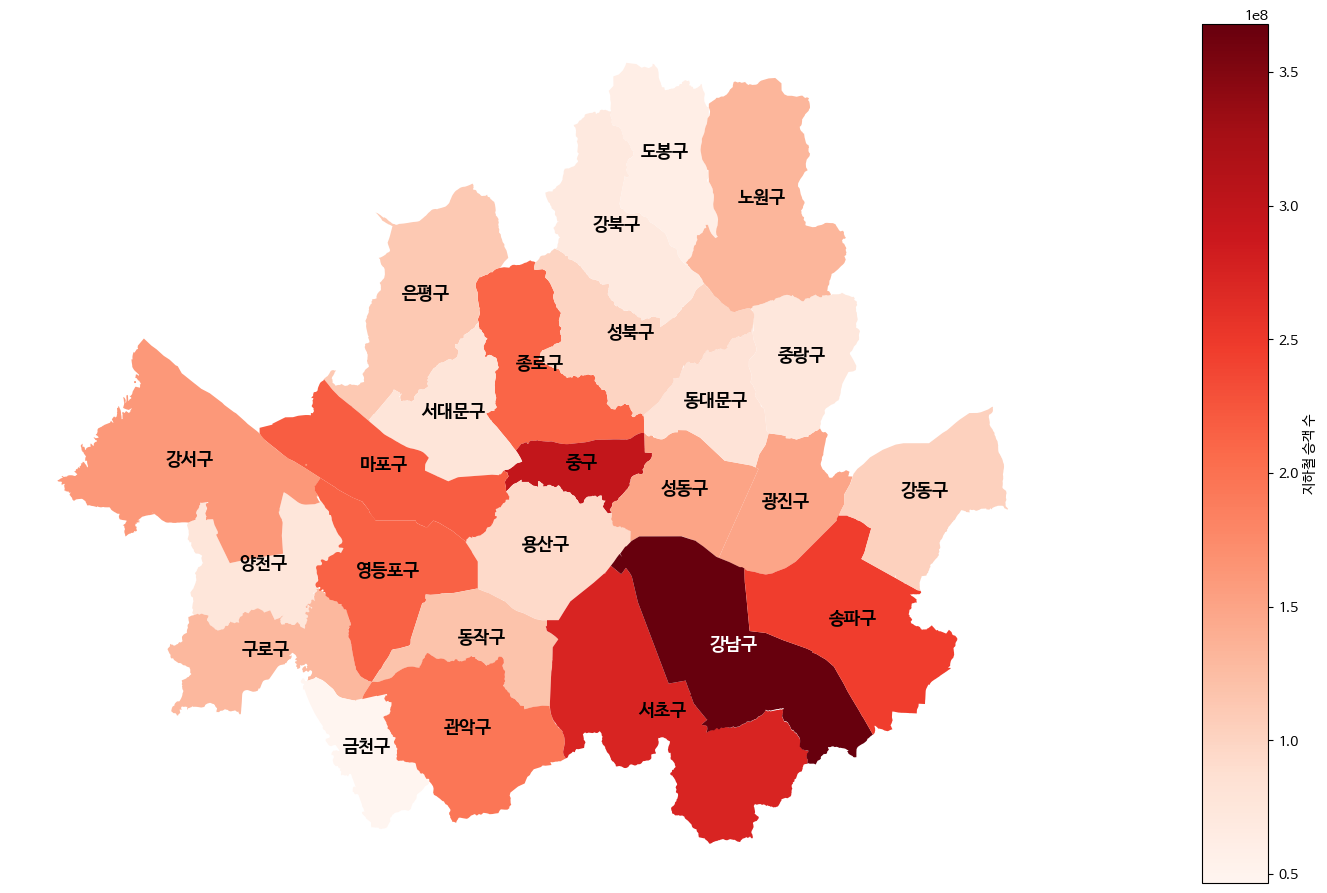

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1, 1, figsize=(18, 13))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf_seoul.plot(column='지하철_승객_수', ax=ax, legend=True, cmap='Reds', cax=cax,
               legend_kwds={'label': "지하철 승객 수"})

# 컬러 바의 숫자 포맷 조정
formatter = ticker.ScalarFormatter(useOffset=False)
cax.yaxis.set_major_formatter(formatter)

# 지역명 추가
for idx, row in gdf_seoul.iterrows():
    x, y = row['center'].x, row['center'].y  # center는 각 지역의 중심점을 나타내는 Point 객체
    text_color = "white" if row["지하철_승객_수"] >= 300000000 else 'black'
    ax.text(x, y, row["자치구_명칭"], fontsize=13, color=text_color, ha='center', fontweight='bold')

ax.set_axis_off()
plt.show()